# Proyek Klasifikasi Gambar: Klasifikasi pneumonia
- **Nama:** Labiba Adinda Zahwana
- **Email:** labibaadinda11@gmail.com
- **ID Dicoding:** labibaadinda

Proyek ini bertujuan untuk mengembangkan model CNN (Convolutional Neural Network) yang dapat mengklasifikasikan citra rontgen dada (chest X-ray) untuk mendeteksi pneumonia pada anak-anak usia 1 hingga 5 tahun. Dataset yang digunakan dalam proyek ini berasal dari Guangzhou Women and Children’s Medical Center, Guangzhou, yang berfokus pada citra rontgen dada anak-anak sebagai bagian dari perawatan klinis rutin mereka.

## Import Semua Packages/Library yang Digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
from PIL import Image, ImageFile
# Allow truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Mounting Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.5.5.0.38.14
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.3.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.2
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet=

## Data Preparation

### Data Loading

**Deskripsi Dataset:**
Dataset ini terdiri dari 5.863 gambar rontgen dada yang dikategorikan ke dalam dua kelas, yaitu Pneumonia dan Normal. Dataset ini terbagi menjadi tiga folder utama:

1. Train (untuk pelatihan model AI),

2. Test (untuk pengujian model),

3. Val (untuk validasi model).

In [3]:
data_dir = Path('/content/drive/MyDrive/dataset/chest_xray')
tf.random.set_seed(42)
np.random.seed(42)

### Data Preprocessing

#### Split Dataset

In [4]:
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'
val_dir = data_dir / 'val'

In [5]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [7]:
class_names_train = train_ds.class_names # untuk nunjukin ada class apa aja di dalam data set training
print(class_names_train)
class_names_val = val_ds.class_names # untuk nunjukin ada class apa aja di dalam data set validation
print(class_names_val)
class_names_test = test_ds.class_names # untuk nunjukin ada class apa aja di dalam data set test
print(class_names_test)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [8]:
class_names = train_ds.class_names # inisialisasi kelas dengan nama kelas yang ada di dataset pelatihan

def show_images(dataset, title): # fungsi untuk nampilin beberapa gambar
    plt.figure(figsize=(6, 6)) # ukuran gambar / figure 6x6 inci
    for images, labels in dataset.take(1): # mengambil satu batch gambar dan label dari dataset menggunakan .take(1). Metode .take(1)
        for i in range(9): # menampilkan 9 gambar didalam grid 3x3
            ax = plt.subplot(3, 3, i+1) # subplot untuk setting grid dgn 3 baris dan 3 kolom dan i+1 menentukan posisi gambar yang ditampilin (dimulai dr 1)
            plt.imshow(images[i].numpy().astype('uint8')) # uint8 adalah format umum untuk gambar yang memiliki rentang nilai 0-255 (standar piksel gambar)
            plt.title(class_names[labels[i]]) # labels[i] digunakan untuk mengambil label gambar ke-i dari batch
            plt.axis('off') # nonaktifkan sumbu (axis) untuk tampilan gambar agar hanya gambar yang ditampilkan tanpa informasi sumbu
    plt.suptitle(title) # nambahin judul utama untuk seluruh tampilan grid gambar
    plt.show() # nampilin gambar dlm gridnya

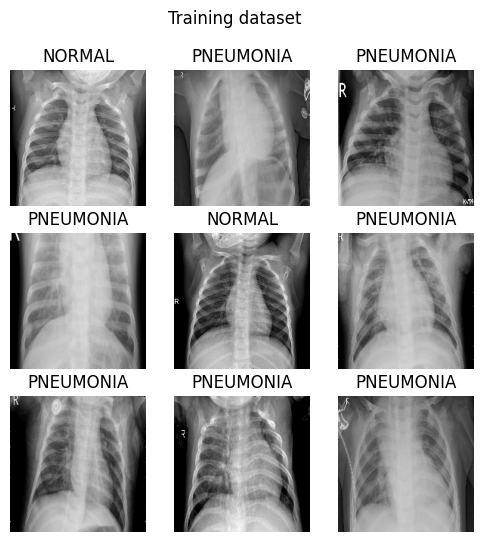

In [9]:
show_images(train_ds, 'Training dataset')

Code untuk fungsi dibawah ini
1. count_classes: Menghitung jumlah file dalam folder kelas tertentu.

2. create_class_counts_df: Menghasilkan DataFrame yang berisi jumlah file untuk setiap kelas dalam dataset.

3. plot_class_distribution: Menampilkan grafik batang yang menunjukkan distribusi jumlah gambar di setiap kelas.

In [10]:
def count_classes(dataset, class_name): # enghitung jumlah gambar atau file
    return len(list(Path.glob(dataset, f"{class_name}/*")))

def create_class_counts_df(dataset, class_names):
    counts = {'class':[], 'count': []}
    for class_name in class_names: # gabungin count_classes untuk setiap kelas dalam dataset
        counts['class'].append(class_name)
        counts['count'].append(count_classes(dataset, class_name))
    return pd.DataFrame(counts) # mengembalikan DataFrame yang berisi informasi jumlah file untuk setiap kelas.

def plot_class_distribution(df, title, palette="viridis"): # memvisualisasikan distribusi jumlah gambar dalam berbagai kelas dgn bar plot
    sns.barplot(x='class', y='count', data=df, palette=palette)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

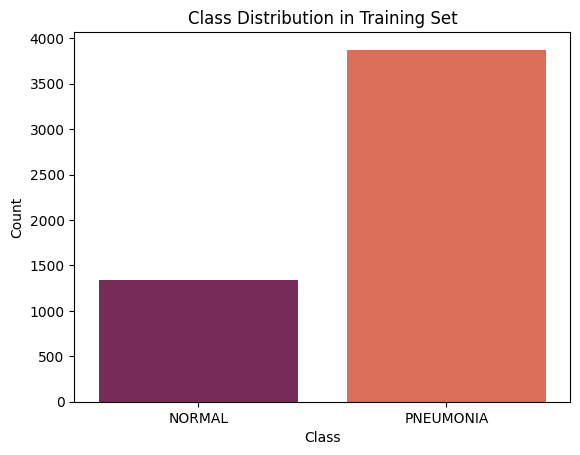

In [11]:
train_df = create_class_counts_df(train_dir, class_names) # manggil fungsi diatas untuk menghitung byk nya di masing masing class
plot_class_distribution(train_df, 'Class Distribution in Training Set', palette='rocket') # visualisasiin distribusinya

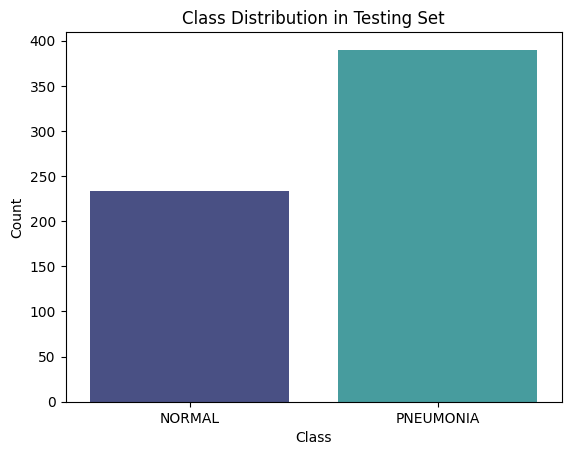

In [12]:
test_df = create_class_counts_df(test_dir, class_names)
plot_class_distribution(test_df, 'Class Distribution in Testing Set', palette='mako')

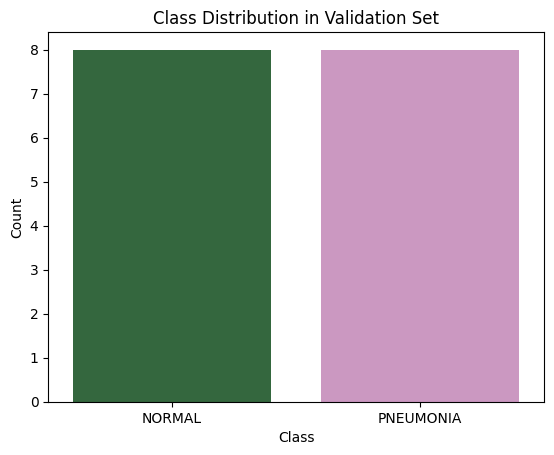

In [13]:
val_df = create_class_counts_df(val_dir, class_names)
plot_class_distribution(val_df, 'Class Distribution in Validation Set', palette='cubehelix')

In [14]:
# ImageDataGenerator di Keras, yang digunakan untuk melakukan augmentasi dan pra-pemrosesan gambar pada dataset
train_datagen = ImageDataGenerator(rescale=1./255, # normalisasi untuk mengubah nilai piksel gambar agar berada dalam rentang [0, 1]
                                  shear_range=0.2, # memiringkan gambar secara acak dengan nilai maksimum sebesar 20% dari gambar
                                  zoom_range=0.2, # zoom secara acak pada gambar, sehingga gambar dapat zoom in atau zoom out dengan skala hingga 20%
                                  horizontal_flip=True) # membalik gambar secara horizontal dengan probabilitas 50%
test_datagen = ImageDataGenerator(rescale=1./255) # normalisasi untuk mengubah nilai piksel gambar agar berada dalam rentang [0, 1]
val_datagen = ImageDataGenerator(rescale=1./255) # normalisasi untuk mengubah nilai piksel gambar agar berada dalam rentang [0, 1]

In [15]:
# memuat gambar dari direktori ke dalam format yang dapat diproses oleh model
training_set = train_datagen.flow_from_directory(train_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH), # normalisasi agar ukurannya sama
                                                batch_size=32, # memproses 32 gambar tiap iterasi
                                                class_mode='binary') # karena ada dua kelas pneumonia dan normal jadi yang tepat adalah binary

Found 5216 images belonging to 2 classes.


In [16]:
# memuat gambar dari direktori ke dalam format yang dapat diproses oleh model
test_set = train_datagen.flow_from_directory(test_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH), # normalisasi agar ukurannya sama
                                                batch_size=32, # memproses 32 gambar tiap iterasi
                                                class_mode='binary') # karena ada dua kelas pneumonia dan normal jadi yang tepat adalah binary

Found 624 images belonging to 2 classes.


In [17]:
# memuat gambar dari direktori ke dalam format yang dapat diproses oleh model
val_set = train_datagen.flow_from_directory(val_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH), # normalisasi agar ukurannya sama
                                                batch_size=32, # memproses 32 gambar tiap iterasi
                                                class_mode='binary') # karena ada dua kelas pneumonia dan normal jadi yang tepat adalah binary

Found 16 images belonging to 2 classes.


## Modelling

In [18]:
# ntuk mengklasifikasikan gambar dalam bentuk data 3D (RGB) berdasarkan ukuran yang sudah ditentukan
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), # lapisan pertama yang menentukan ukuran input untuk jaringan
    layers.Conv2D(32, (3, 3), activation='relu'), # untuk mengekstraksi fitur dari gambar, 32 disini adalah jumlah filternya
    layers.MaxPooling2D((2, 2)), # untuk mengurangi dimensi (downsampling) dan menjaga informasi penting dari fitur yang diekstraks
    layers.Conv2D(64, (3, 3), activation='relu'), # jumlah filternya 64
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), # 128 jml filter
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'), # menghubungkan setiap neuron dengan setiap neuron di lapisan sebelumnya
    layers.Dense(1, activation='sigmoid') # menggunakan aktivasi sigmoid digunakan untuk menghasilkan output 0 atau 1. karena ada dua kelas pneumonia dan normal jadi yang tepat adalah binary
])
model.summary() #  untuk menampilkan ringkasan dari model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,105 (25.36 MB)

 Trainable params: 6,647,105 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

callbacks dilakukan agar mengefesiensikan waktu training model

In [19]:
# Membuat custom callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Jika akurasi validasi lebih besar dari 86%, stop training
        if logs.get('val_accuracy') > 0.86:
            print("Val akurasi telah mencapai >86%!")
            self.model.stop_training = True
# Inisialisasi callback
callbacks = myCallback()

compile model
1. optimizer=`adam`:
- Optimizer adalah algoritma yang digunakan untuk memperbarui bobot model selama proses pelatihan agar model dapat meminimalkan fungsi kerugian (loss function).
- `adam` adalah salah satu optimizer yang paling populer dan sering digunakan dalam deep learning. Adam (Adaptive Moment Estimation) adalah optimizer yang menggabungkan kelebihan dari dua algoritma sebelumnya, yaitu AdaGrad dan RMSProp. Adam melakukan pembaruan bobot dengan memanfaatkan rata-rata pertama (momentum) dan rata-rata kedua (kelipatan kuadrat gradien) untuk menyesuaikan langkah pembelajaran secara adaptif.
2. loss=`binary_crossentropy`:
- Loss function (fungsi kerugian) digunakan untuk mengukur seberapa baik model melakukan prediksi terhadap data yang sebenarnya. Selama pelatihan, model mencoba meminimalkan nilai fungsi kerugian ini untuk meningkatkan akurasi.
- `binary_crossentropy` adalah fungsi kerugian yang digunakan dalam masalah klasifikasi biner (dua kelas). Ini mengukur perbedaan antara distribusi probabilitas yang diprediksi oleh model dan distribusi probabilitas yang benar (ground truth) untuk masalah klasifikasi dua kelas.
-`Binary cross-entropy` sangat berguna saat output model yang probabilitas dua kelas, seperti dalam case ini pneumonia dan normal

In [20]:
model.compile(optimizer='adam', # menggunakan algoritma optimasi Adam untuk pembaruan bobot model selama pelatihan.
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
# training model dengan dataset training
history = model.fit(training_set, # fit() digunakan untuk melatih model.
                   validation_data=test_set, # data validasi digunakan untuk mengevaluasi kinerja model pada data yang tidak terlihat selama pelatihan.
                   epochs=15, # total iterasi dengan batasan callbacks
                   callbacks = [callbacks] # memonitor kinerja model
                   )

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.7552 - loss: 0.5260 - val_accuracy: 0.8173 - val_loss: 0.3959
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9004 - loss: 0.2447 - val_accuracy: 0.7612 - val_loss: 0.6648
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.9194 - loss: 0.2019 - val_accuracy: 0.7404 - val_loss: 0.7456
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 0.9263 - loss: 0.1815 - val_accuracy: 0.8558 - val_loss: 0.3561
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9353 - loss: 0.1640Val akurasi telah mencapai >86%!
163/163 ━━━━━━━━━━━━━━━━━━━━ 492s 3s/step - accuracy: 0.9353 - loss: 0.1641 - val_accuracy: 0.8670 - val_loss: 0.3442


## Evaluasi dan Visualisasi

In [22]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8763 - loss: 0.3509
Test Accuracy: 0.88
Test Loss: 0.32


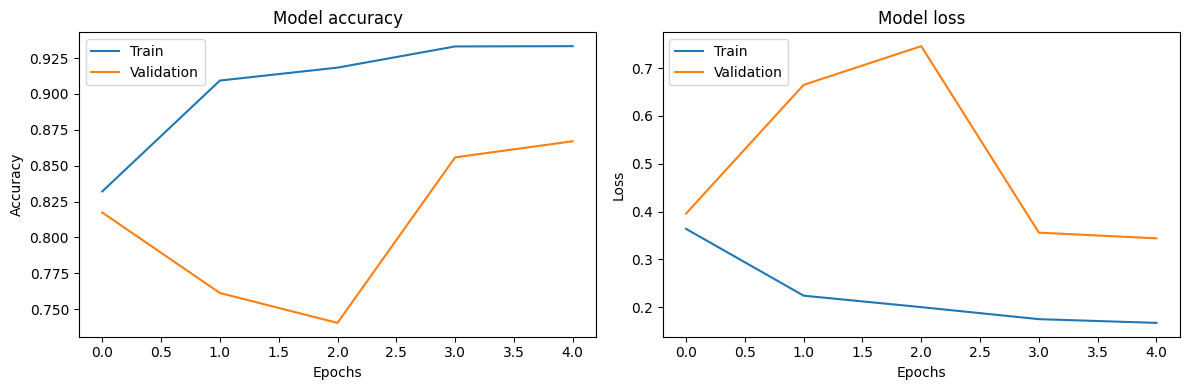

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Berhasil** membuat model dengan **accuracy: 0.9353 dan val_accval_accuracy: 0.8670**

## Konversi Model

In [24]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [41]:
# Menyimpan model dalam format SavedModel
model.export('/content/saved_model')

# Mengompres folder saved_model menjadi file ZIP
shutil.make_archive('/content/saved_model', 'zip', '/content', 'saved_model')

# Mengunduh file ZIP yang berisi model
files.download('/content/saved_model.zip')


Saved artifact at '/content/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132566850880144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566850879760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789132688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789136912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789132496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789134416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789132304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566850338256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789135376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789137104: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import tensorflowjs as tfjs
import shutil
from google.colab import files

# 1. Mengonversi model ke format TensorFlow.js
tfjs.converters.save_keras_model(model, '/content/tfjs_model')

# 2. Mengompres folder tfjs_model menjadi file ZIP
shutil.make_archive('/content/tfjs_model', 'zip', '/content', 'tfjs_model')

# 3. Mengunduh file ZIP yang berisi model TensorFlow.js
files.download('/content/tfjs_model.zip')

failed to lookup keras version from the file,
    this is likely a weight only file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Menggunakan TFLiteConverter untuk mengonversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Konversi model ke TFLite
tflite_model = converter.convert()

# Tentukan path di Google Colab untuk menyimpan model TFLite
tflite_model_file = '/content/model.tflite'

# Menyimpan model TFLite ke file
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

print(f"Model berhasil disimpan ke {tflite_model_file}")


Saved artifact at '/tmp/tmpijlqpfkq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132566850880144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566850879760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789132688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789136912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789132496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789134416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789132304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566850338256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789135376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132566789137104: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil d

In [30]:
from google.colab import files

# Mengunduh model TFLite yang telah disimpan
files.download(tflite_model_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import os

# Membuat direktori 'tflite/' jika belum ada
os.makedirs('tflite', exist_ok=True)

# Simpan label ke dalam file label.txt
with open('tflite/label.txt', 'w') as f:
    for label in labels:
        f.write(f"{label}\n")

print("Label berhasil disimpan ke 'tflite/label.txt'")

Label berhasil disimpan ke 'tflite/label.txt'
